# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
response = requests.get(url)
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    response = requests.get(city_url)
    # Add 1 to the record count
    record_count += 1
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

        # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 2 of Set 1 | enewetak
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | serafimovich
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | benton
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | andergrove
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | benguela
Processing Record 16 of Set 1 | krasnokamensk
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | chebba
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | chulakkurgan
Processing Re

Processing Record 45 of Set 4 | san martin
Processing Record 46 of Set 4 | brady
Processing Record 47 of Set 4 | ca mau
Processing Record 48 of Set 4 | vadso
Processing Record 49 of Set 4 | stanley
Processing Record 50 of Set 4 | ahau
City not found. Skipping...
Processing Record 1 of Set 5 | luanda
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | kikwit
Processing Record 5 of Set 5 | qaqortoq
Processing Record 6 of Set 5 | sheridan
Processing Record 7 of Set 5 | punta arenas
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | vorgashor
Processing Record 10 of Set 5 | amahai
Processing Record 11 of Set 5 | tazacorte
Processing Record 12 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 13 of Set 5 | bedford
Processing Record 14 of Set 5 | miyako
Processing Record 15 of Set 5 | mahibadhoo
Processing Record 16 of Set 5 | talnakh
Processing Record 17 of Set 5 | moroto
Processing

Processing Record 36 of Set 8 | horta
Processing Record 37 of Set 8 | la'ie
Processing Record 38 of Set 8 | nieuw amsterdam
Processing Record 39 of Set 8 | chyhyryn
Processing Record 40 of Set 8 | urengoy
Processing Record 41 of Set 8 | minas de marcona
Processing Record 42 of Set 8 | pekan
Processing Record 43 of Set 8 | smithers
Processing Record 44 of Set 8 | coahuayana de hidalgo
Processing Record 45 of Set 8 | konarka
Processing Record 46 of Set 8 | lautoka
Processing Record 47 of Set 8 | nizhniy odes
Processing Record 48 of Set 8 | izazi
Processing Record 49 of Set 8 | pelotas
Processing Record 50 of Set 8 | masuda
Processing Record 1 of Set 9 | batouri
Processing Record 2 of Set 9 | murun-kuren
Processing Record 3 of Set 9 | mudgee
Processing Record 4 of Set 9 | la gi
Processing Record 5 of Set 9 | ak'ordat
Processing Record 6 of Set 9 | bulungu
Processing Record 7 of Set 9 | valday
Processing Record 8 of Set 9 | kayangel
Processing Record 9 of Set 9 | eureka
Processing Record 1

Processing Record 27 of Set 12 | viqueque
Processing Record 28 of Set 12 | khilchipur
Processing Record 29 of Set 12 | fort st. john
Processing Record 30 of Set 12 | malegaon
Processing Record 31 of Set 12 | holualoa
Processing Record 32 of Set 12 | shache
Processing Record 33 of Set 12 | grasse
Processing Record 34 of Set 12 | yinchuan
Processing Record 35 of Set 12 | hammerfest
Processing Record 36 of Set 12 | arris
Processing Record 37 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 38 of Set 12 | high rock
Processing Record 39 of Set 12 | barcelona
Processing Record 40 of Set 12 | kumba
Processing Record 41 of Set 12 | olinda
Processing Record 42 of Set 12 | pindushi
Processing Record 43 of Set 12 | lepsy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,28.47,78,91,5.21,MH,1689885107
1,edinburgh of the seven seas,-37.0676,-12.3116,11.74,59,24,9.96,SH,1689885110
2,college,64.8569,-147.8028,19.18,90,100,1.54,US,1689885133
3,serafimovich,49.5786,42.7360,18.94,57,27,2.11,RU,1689885213
4,tazovsky,67.4667,78.7000,17.14,75,57,4.34,RU,1689885134
...,...,...,...,...,...,...,...,...,...
567,barcelona,41.3888,2.1590,27.64,79,20,5.14,ES,1689885211
568,kumba,4.6363,9.4469,22.74,97,100,0.64,CM,1689885262
569,olinda,-8.0089,-34.8553,25.85,78,40,7.20,BR,1689885135
570,pindushi,62.9152,34.5800,14.16,97,100,4.29,RU,1689885262


In [5]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df = # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,enewetak,11.3474,162.3373,28.47,78,91,5.21,MH,1689885107
1,edinburgh of the seven seas,-37.0676,-12.3116,11.74,59,24,9.96,SH,1689885110
2,college,64.8569,-147.8028,19.18,90,100,1.54,US,1689885133
3,serafimovich,49.5786,42.7360,18.94,57,27,2.11,RU,1689885213
4,tazovsky,67.4667,78.7000,17.14,75,57,4.34,RU,1689885134


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,28.47,78,91,5.21,MH,1689885107
1,edinburgh of the seven seas,-37.0676,-12.3116,11.74,59,24,9.96,SH,1689885110
2,college,64.8569,-147.8028,19.18,90,100,1.54,US,1689885133
3,serafimovich,49.5786,42.7360,18.94,57,27,2.11,RU,1689885213
4,tazovsky,67.4667,78.7000,17.14,75,57,4.34,RU,1689885134


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

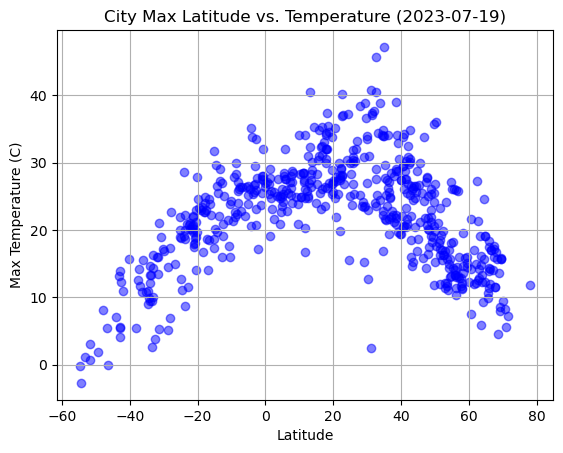

In [9]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

# Create the scatter plot
plt.scatter(latitude, temperature, marker="o", c="blue", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-07-19)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

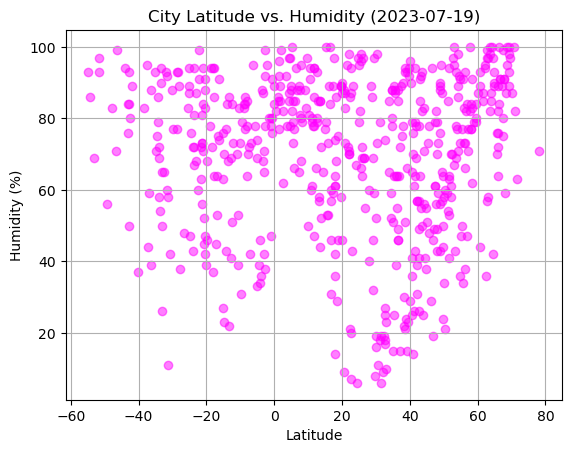

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, marker="o", c="magenta", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-07-19)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

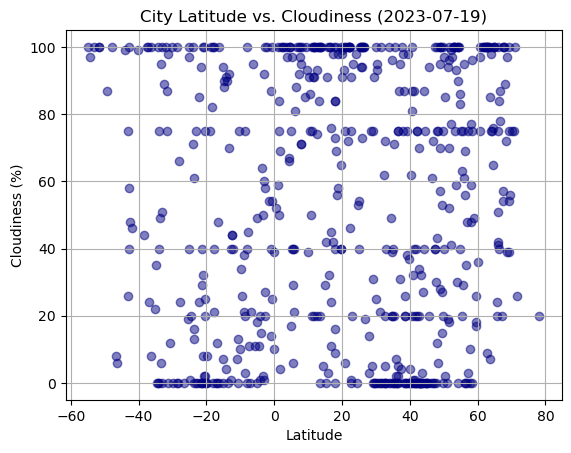

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, marker="o", c="navy", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-07-19)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

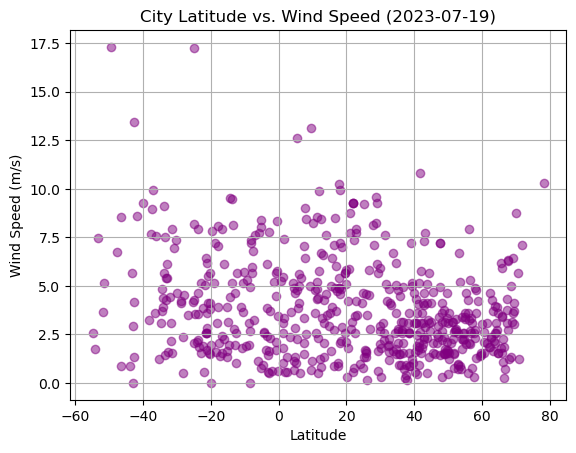

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind = city_data_df["Wind Speed"]
plt.scatter(latitude, wind, marker="o", c="purple", alpha=0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-07-19)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,enewetak,11.3474,162.3373,28.47,78,91,5.21,MH,1689885107
2,college,64.8569,-147.8028,19.18,90,100,1.54,US,1689885133
3,serafimovich,49.5786,42.7360,18.94,57,27,2.11,RU,1689885213
4,tazovsky,67.4667,78.7000,17.14,75,57,4.34,RU,1689885134
5,benton,36.3334,-94.3335,34.16,64,0,2.57,US,1689885213


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,11.74,59,24,9.96,SH,1689885110
6,adamstown,-25.0660,-130.1015,22.01,87,100,17.25,PN,1689885108
7,papatowai,-46.5619,169.4708,5.43,71,8,8.54,NZ,1689885110
8,waitangi,-43.9535,-176.5597,7.12,94,99,0.89,NZ,1689885108
9,andergrove,-21.0833,149.1833,17.54,84,32,2.84,AU,1689885213


###  Temperature vs. Latitude Linear Regression Plot

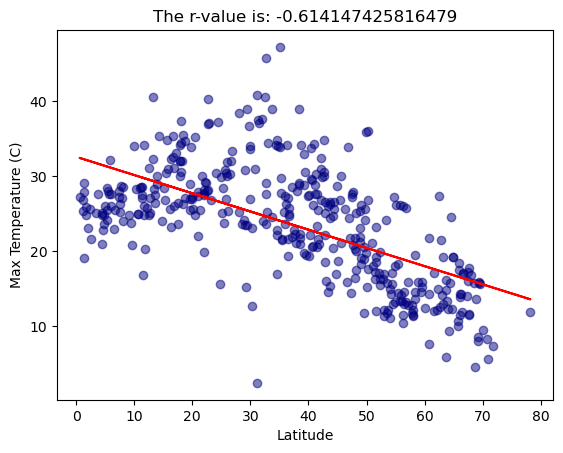

In [27]:
# Linear regression on Northern Hemisphere
def linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Linear regression parameters
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)

    # Create the regression line
    regression_line = [slope * x + intercept for x in x_data]

    # Create the scatter plot
    plt.scatter(x_data, y_data, marker="o", c="navy", alpha=0.5) 

    # Create the regression line plot
    plt.plot(x_data, regression_line, c='red')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"The r-value is: {r_value}")

   # Retrieve the temperature and latitude data for Northern Hemisphere
temperature_nh = northern_hemi_df["Max Temp"]
latitude_nh = northern_hemi_df["Lat"]

# Create the Linear Regression plot for Temperature vs. Latitude in Northern Hemisphere
linear_regression_plot(latitude_nh, temperature_nh, "Latitude", "Max Temperature (C)", "Nothern Hemisphere")

# Save the figure
plt.savefig("output_data/linreg1.png")


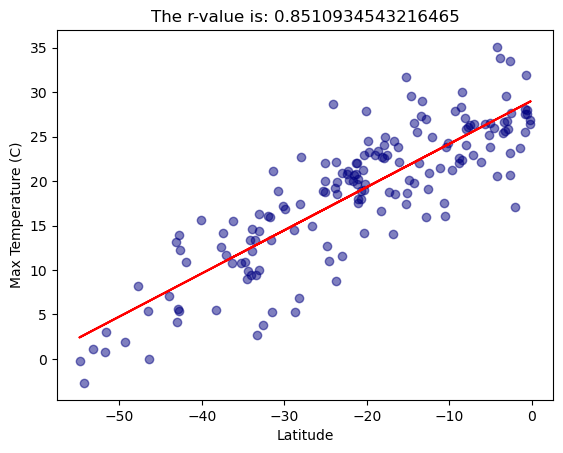

In [28]:
# Linear regression on Southern Hemisphere

temperature_sh = southern_hemi_df["Max Temp"]
latitude_sh = southern_hemi_df["Lat"]

# Create the Linear Regression plot for Temperature vs. Latitude in Southern Hemisphere
linear_regression_plot(latitude_sh, temperature_sh, "Latitude", "Max Temperature (C)", "Southern Hemisphere")

# Save the figure
plt.savefig("output_data/linreg2.png")

### Humidity vs. Latitude Linear Regression Plot

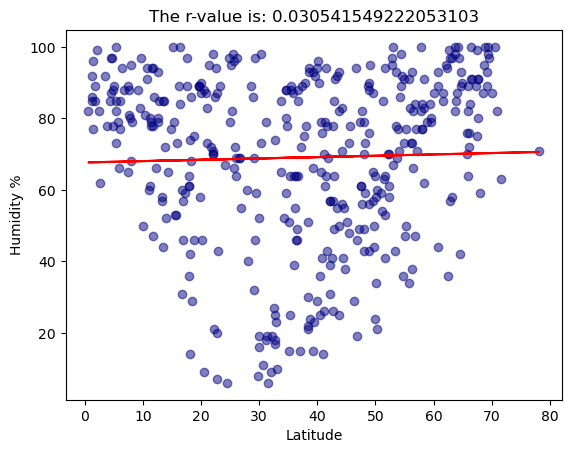

In [29]:
# Northern Hemisphere
humidity_nh = northern_hemi_df["Humidity"]
latitude_nh = northern_hemi_df["Lat"]

# Create the Linear Regression plot for Humidity vs. Latitude in Northern Hemisphere
linear_regression_plot(latitude_nh, humidity_nh, "Latitude", "Humidity %", "Nothern Hemisphere")

# Save the figure
plt.savefig("output_data/linreg3.png")

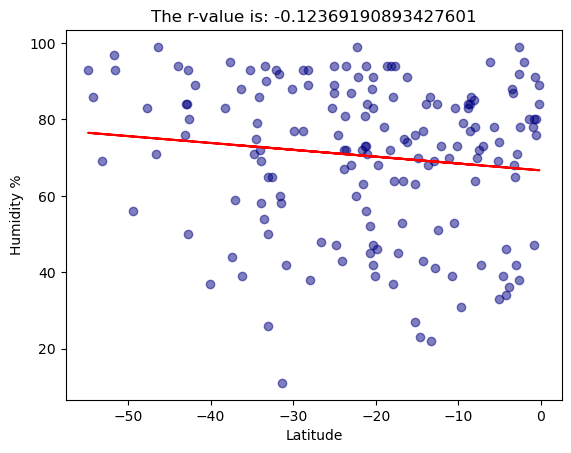

In [30]:
# Southern Hemisphere
humidity_sh = southern_hemi_df["Humidity"]
latitude_sh = southern_hemi_df["Lat"]

# Create the Linear Regression plot for Humidity vs. Latitude in Southern Hemisphere
linear_regression_plot(latitude_sh, humidity_sh, "Latitude", "Humidity %", "Southern Hemisphere")

# Save the figure
plt.savefig("output_data/linreg4.png")

### Cloudiness vs. Latitude Linear Regression Plot

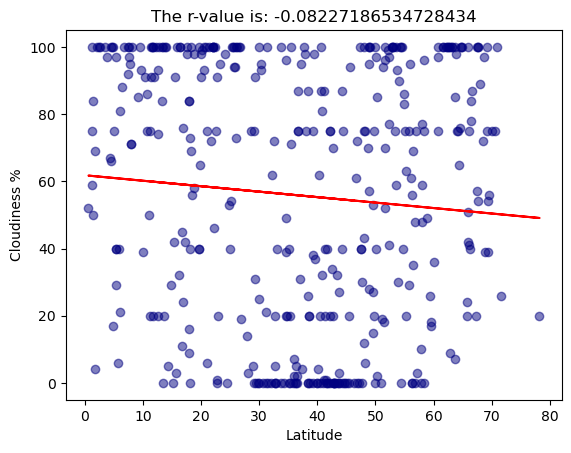

In [31]:
# Northern Hemisphere
cloud_nh = northern_hemi_df["Cloudiness"]
latitude_nh = northern_hemi_df["Lat"]

# Create the Linear Regression plot for Cloudiness vs. Latitude in Northern Hemisphere
linear_regression_plot(latitude_nh, cloud_nh, "Latitude", "Cloudiness %", "Nothern Hemisphere")

# Save the figure
plt.savefig("output_data/linreg5.png")

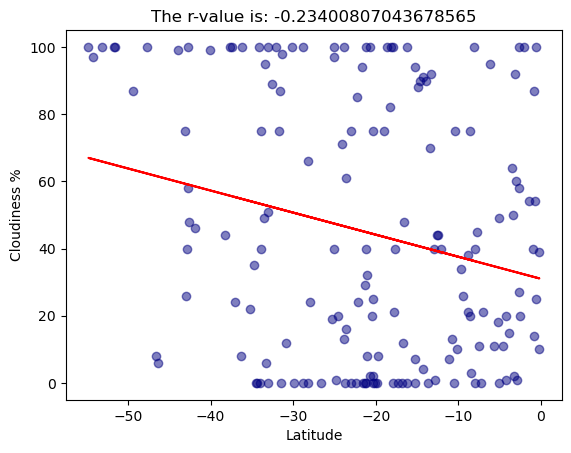

In [32]:
# Southern Hemisphere
cloud_sh = southern_hemi_df["Cloudiness"]
latitude_sh = southern_hemi_df["Lat"]

# Create the Linear Regression plot for Cloudiness vs. Latitude in Northern Hemisphere
linear_regression_plot(latitude_sh, cloud_sh, "Latitude", "Cloudiness %", "Southern Hemisphere")

# Save the figure
plt.savefig("output_data/linreg6.png")

### Wind Speed vs. Latitude Linear Regression Plot

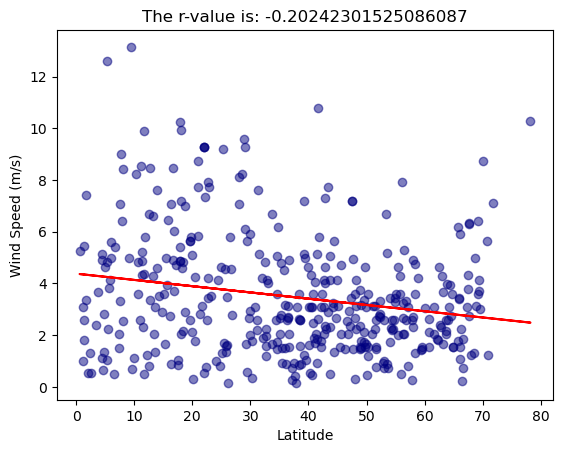

In [33]:
# Northern Hemisphere
wind_nh = northern_hemi_df["Wind Speed"]
latitude_nh = northern_hemi_df["Lat"]

# Create the Linear Regression plot for Wind Speed vs. Latitude in Northern Hemisphere
linear_regression_plot(latitude_nh, wind_nh, "Latitude", "Wind Speed (m/s)", "Nothern Hemisphere")

# Save the figure
plt.savefig("output_data/linreg7.png")

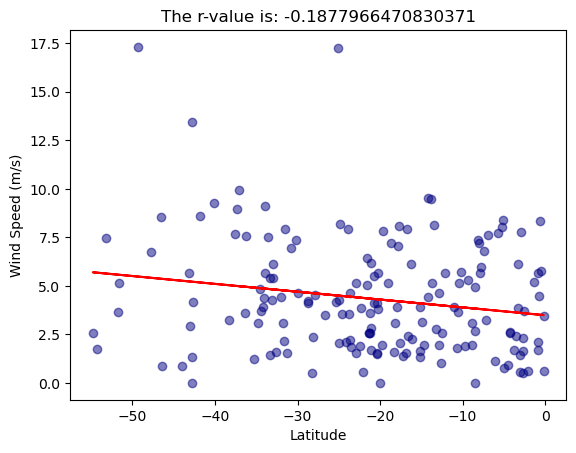

In [34]:
# Southern Hemisphere
wind_sh = southern_hemi_df["Wind Speed"]
latitude_sh = southern_hemi_df["Lat"]

# Create the Linear Regression plot for Wind Speed vs. Latitude in Northern Hemisphere
linear_regression_plot(latitude_sh, wind_sh, "Latitude", "Wind Speed (m/s)", "Southern Hemisphere")

# Save the figure
plt.savefig("output_data/linreg8.png")